#  Actividad | Clasificación ensambles y presentación ejecutiva

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

Alumno: **Francisco Javier Hernandez Camarillo**  
Matricula: **A00998083**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **María de la Paz Rico**

Fechas: **Martes 18 de noviembre de 2022**

---

In [231]:
# Importar librerias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from statistics import *


import geopandas as gpd
from shapely.geometry import Point

In [224]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

### Selecciona tus variables independientes X y dependiente Y (semáforo)

In [200]:
# Lectura de los datos
path = 'aguas_subterraneas_2020.csv'
df = pd.read_csv(path)

pd.set_option('display.max_columns', None)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates,CLUSTER
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,5,-102.02210,22.20887,2020,-0.042353,0,-0.162389,4,-0.106114,1,1,-0.052814,3,-0.377400,1,-0.173696,4,-0.016359,2,-0.097151,0,-0.033439,1,-0.053771,1,-0.12187,1,-0.087139,1,-0.188709,0,-0.057996,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,POINT (-102.0221 22.20887),0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,5,-102.20075,21.99958,2020,-0.024351,0,-0.428330,0,-0.163340,3,1,-0.077060,3,-0.456894,1,-0.173696,4,0.170575,1,-0.174219,0,-0.033439,1,-0.053771,1,-0.12187,1,-0.087139,1,-0.188709,0,-0.069501,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,POINT (-102.20075 21.99958),0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,5,-102.28801,22.36685,2020,-0.268016,0,-0.489208,0,-0.200744,3,1,0.376085,0,-0.635204,1,-0.173696,4,-0.342934,2,0.499410,1,-0.033439,1,-0.053771,1,-0.12187,1,-0.087139,1,-0.188709,0,-0.069501,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,POINT (-102.28801 22.36685),0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,5,-102.29449,22.18435,2020,0.830862,0,-0.365850,0,-0.151331,3,1,0.022977,3,-0.415796,1,-0.173696,4,-0.365766,2,-0.117132,0,-0.033439,1,-0.053771,1,-0.12187,1,-0.087139,1,-0.188709,0,-0.069501,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,POINT (-102.29449 22.18435),0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,5,-110.24480,23.45138,2020,0.676805,0,0.559336,4,0.102029,0,0,-0.437369,1,0.352266,1,-0.033290,0,1.355400,0,-0.271267,2,-0.033439,1,-0.053771,1,-0.12187,1,-0.087139,1,-0.188709,0,-0.069501,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,POINT (-110.2448 23.45138),1


In [201]:
variables_string = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO']
variables_categoricas = ['SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_FE', 'CALIDAD_MN', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']
variables_numericas = ['ALC_mg/L','CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

# Seleccion de variables independientes
X = df[np.append(variables_categoricas, variables_numericas)]
y = df[['SEMAFORO']]

### Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [202]:
# Anteriormente se aplico el LabelEncoder() a la columna semaforo, por lo que los calores quedaron en 0, 1, 3. Asi que para cambiar a los valores 1,2,3
y.loc[:,('SEMAFORO')] = y['SEMAFORO'].astype("category")
y.loc[:,('SEMAFORO')]  = y['SEMAFORO'].cat.rename_categories([1, 2, 3])
print(y['SEMAFORO'])

# 1 = Amarillo
# 2 = Rojo
# 3 = Green

0       3
1       3
2       2
3       3
4       2
       ..
1049    2
1050    2
1051    2
1052    3
1053    3
Name: SEMAFORO, Length: 1054, dtype: category
Categories (3, int64): [1, 2, 3]


c:\Users\erick\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\Users\erick\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


### Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [203]:
# Seleccion de modelo
modelo = RandomForestClassifier()

# Entrenamiento de modelo
modelo.fit(X, y['SEMAFORO'].ravel())

# Lista de las features importances a traves de Rendom Forest
feature_importance = modelo.feature_importances_
feature_names = X.columns

# Mostrando la lista con las features ordenadas por importancia
features = pd.DataFrame([feature_names, feature_importance])
ordered_features = features.transpose().sort_values(1,ascending=False)
ordered_features

,0,1
34,FLUORUROS_mg/L,0.080061
5,CALIDAD_FLUO,0.075328
20,CUMPLE_CON_FLUO,0.061932
35,DUR_mg/L,0.057355
36,COLI_FEC_NMP/100_mL,0.050181
37,N_NO3_mg/L,0.048258
38,AS_TOT_mg/L,0.047433
24,CUMPLE_CON_AS,0.046535
6,CALIDAD_DUR,0.046162
21,CUMPLE_CON_DUR,0.040964


### Selecciona las variables de mayor importancia.

In [204]:
# Lista de las Features mas importantes
best_features = ordered_features[0].head(8).to_numpy().tolist()

# Convertir features en DataFrame
x = X[best_features]
x.head()

,FLUORUROS_mg/L,CALIDAD_FLUO,CUMPLE_CON_FLUO,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CUMPLE_CON_AS
0,-0.052814,3,1,-0.377400,-0.173696,-0.016359,-0.097151,1
1,-0.077060,3,1,-0.456894,-0.173696,0.170575,-0.174219,1
2,0.376085,0,0,-0.635204,-0.173696,-0.342934,0.499410,0
3,0.022977,3,1,-0.415796,-0.173696,-0.365766,-0.117132,1
4,-0.437369,1,1,0.352266,-0.033290,1.355400,-0.271267,1


In [249]:
best_features

['FLUORUROS_mg/L',
 'CALIDAD_FLUO',
 'CUMPLE_CON_FLUO',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CUMPLE_CON_AS']

### Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [205]:
# Division del conjunto de datos con 70% para entrenamiento y el resto para pruebas y validacion
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=10)


### Explora que clasificador es el más optimo, ejemplo:
* Decision trees.
* Random Forest.

In [206]:
print("------ Decision trees ------")

# Instancia del modelo clasificador "DesicionTreeClassifier"
DTC = DecisionTreeClassifier()

# Entrenamiento de los datos
DTC.fit(x_train, y_train)

# Realizacion de predicciones
yhatDTC = DTC.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, yhatDTC))

------ Decision trees ------
Accuracy: 0.8138801261829653


In [207]:
print("------ Random Forest ------")

# Instancia del modelo clasificador "DesicionTreeClassifier"
RFC = RandomForestClassifier(n_estimators=100)

# Entrenamiento de los datos
RFC.fit(x_train, y_train['SEMAFORO'].ravel())

# Realizacion de predicciones
yhatRFC = RFC.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, yhatRFC))

------ Random Forest ------
Accuracy: 0.8643533123028391


### Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [211]:
# Lista de las clases de nombres
target_names = ['class 1', 'class 2', 'class 3']

# Reporte de clasificacion de Decision Trees
print("\t\t------ Decision trees ------")
print("\t\tAccuracy:", metrics.accuracy_score(y_test, yhatDTC))
print(classification_report(y_test, yhatDTC, target_names=target_names))

# Reporte de clasificacion de Random Forest
print("\n\n\t\t------ Random Forest ------")
print("\t\tAccuracy:", metrics.accuracy_score(y_test, yhatRFC))
print(classification_report(y_test, yhatRFC, target_names=target_names))

		------ Decision trees ------
		Accuracy: 0.8138801261829653
              precision    recall  f1-score   support

     class 1       0.69      0.75      0.72        81
     class 2       0.91      0.90      0.91       102
     class 3       0.83      0.78      0.80       134

    accuracy                           0.81       317
   macro avg       0.81      0.81      0.81       317
weighted avg       0.82      0.81      0.82       317



		------ Random Forest ------
		Accuracy: 0.8643533123028391
              precision    recall  f1-score   support

     class 1       0.86      0.73      0.79        81
     class 2       0.95      0.91      0.93       102
     class 3       0.81      0.91      0.86       134

    accuracy                           0.86       317
   macro avg       0.87      0.85      0.86       317
weighted avg       0.87      0.86      0.86       317



### Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

[Text(0.5, 1.0, 'Matriz de confusión | Arboles de desición')]

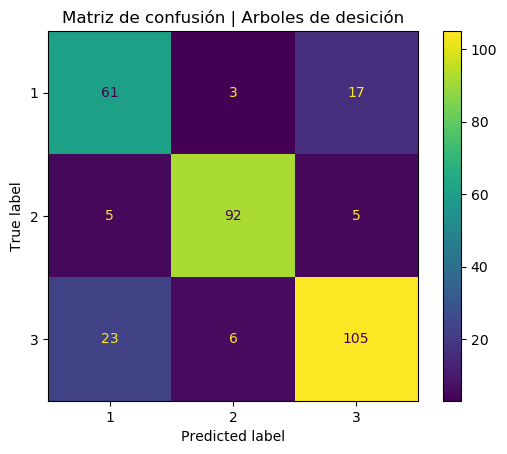

In [247]:
cm = confusion_matrix(y_test, yhatDTC, labels=[1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3])
disp.plot()
disp.ax_.set(title='Matriz de confusión | Arboles de desición')

[Text(0.5, 1.0, 'Matriz de confusión | Bosques Aleatorios')]

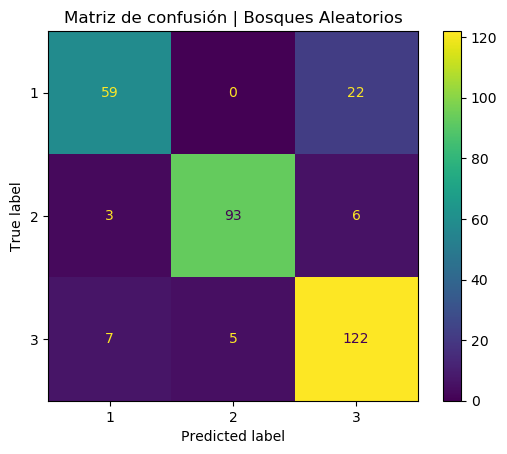

In [250]:
cm = confusion_matrix(y_test, yhatRFC, labels=[1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3])
disp.plot()
disp.ax_.set(title='Matriz de confusión | Bosques Aleatorios')

### Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.